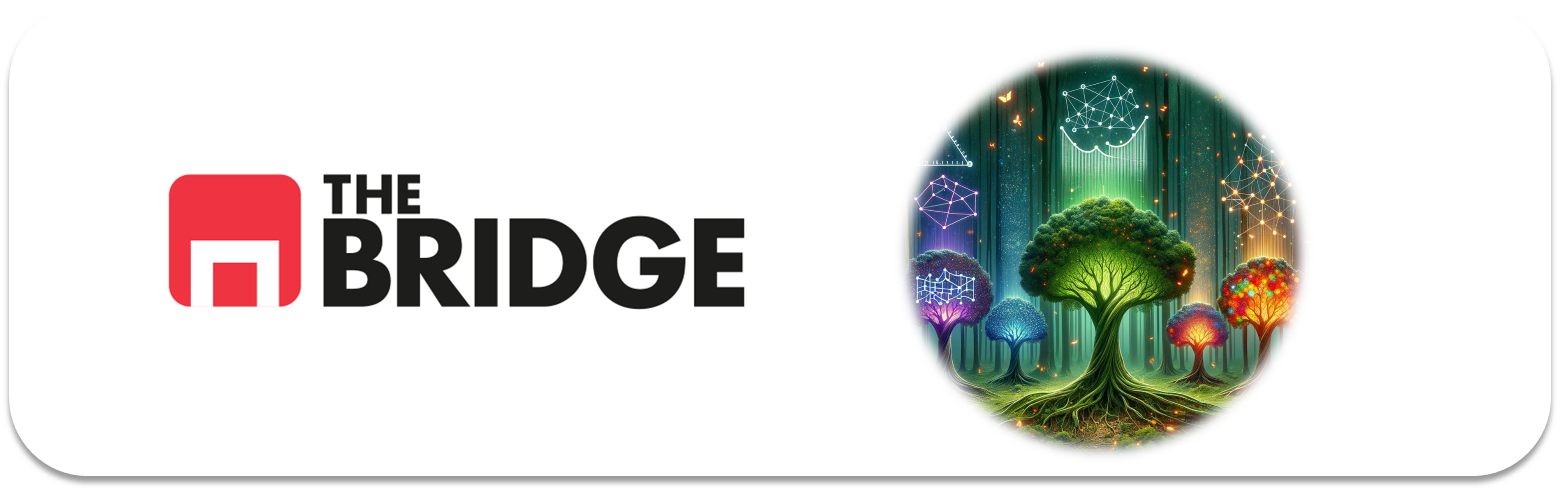

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import bootcampviztools as bvt

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

### 1. Obtención de los Datos

In [2]:
df = pd.read_csv('./data/bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
for column in df.columns:
    print(f"Valores únicos para la columna: '{column}': Total {df[column].nunique()}")
    print(df[column].unique())
    print("-" * 50)

Valores únicos para la columna: 'age': Total 77
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
--------------------------------------------------
Valores únicos para la columna: 'job': Total 12
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
--------------------------------------------------
Valores únicos para la columna: 'marital': Total 3
['married' 'single' 'divorced']
--------------------------------------------------
Valores únicos para la columna: 'education': Total 4
['tertiary' 'secondary' 'unknown' 'primary']
--------------------------------------------------
Valores únicos para la columna: 'default': Total 2
['no' 'yes']
--------------------------------------------------
Valores únicos par

In [5]:
bvt.cardinalidad(df)

,Columna,Card,%_Card,Tipo,Clasificada_como
0,age,77,0.170313,int64,Numerica Discreta
1,job,12,0.026542,object,Categorica
2,marital,3,0.006636,object,Categorica
3,education,4,0.008847,object,Categorica
4,default,2,0.004424,object,Binaria
5,balance,7168,15.854549,int64,Numerica Discreta
6,housing,2,0.004424,object,Binaria
7,loan,2,0.004424,object,Binaria
8,contact,3,0.006636,object,Categorica
9,day,31,0.068567,int64,Numerica Discreta


In [6]:
target = "y"
features = [col for col in df.columns if col != target]

In [7]:
columns_to_check = ['job', 'education', 'contact', 'poutcome']
unknown_counts = df[columns_to_check].apply(lambda col: (col == 'unknown').sum())
unknown_counts


job            288
education     1857
contact      13020
poutcome     36959
dtype: int64

### 2. Train y Test Set

In [8]:
train_set, test_set = train_test_split(df, test_size=0.2, stratify=df[target], random_state=42)

### 3. Mini-EDA

In [9]:
for column in df.columns:
    print(f"Value_counts para la columna: '{column}': Total {len(df[column].unique())}")
    print(df[column].value_counts(True)*100)
    print("-" * 50)

Value_counts para la columna: 'age': Total 77
age
32    4.611710
31    4.414855
33    4.361770
34    4.268873
35    4.189246
        ...   
93    0.004424
90    0.004424
95    0.004424
88    0.004424
94    0.002212
Name: proportion, Length: 77, dtype: float64
--------------------------------------------------
Value_counts para la columna: 'job': Total 12
job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: proportion, dtype: float64
--------------------------------------------------
Value_counts para la columna: 'marital': Total 3
marital
married     60.193316
single      28.289576
divorced    11.517109
Name: proportion, dtype: float64
--------------------------------------------------
Value_counts para la col

In [10]:
train_set.describe()

,age,balance,day,duration,campaign,pdays,previous
count,36168.000000,36168.00000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000
mean,40.892999,1365.49342,15.817961,258.506940,2.763935,40.157238,0.581730
std,10.627075,3068.54350,8.331980,259.142445,3.104161,100.162614,2.408766
min,18.000000,-8019.00000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.00000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,451.00000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1430.25000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.00000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Variables Numéricas

In [11]:
num_features = train_set.describe().columns.to_list()
num_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

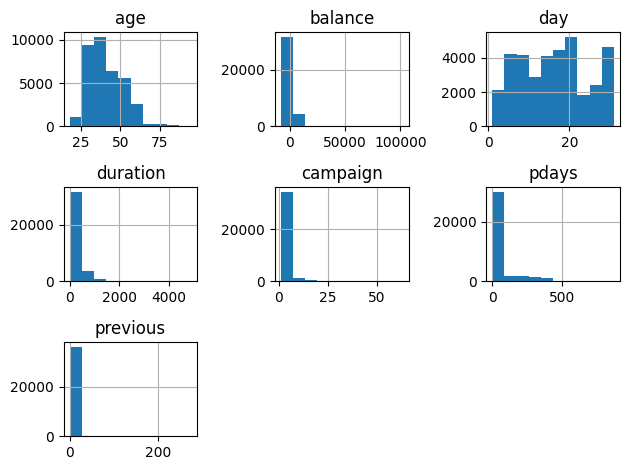

In [12]:
train_set.hist()
plt.tight_layout()
plt.show()

c:\Users\rafae\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


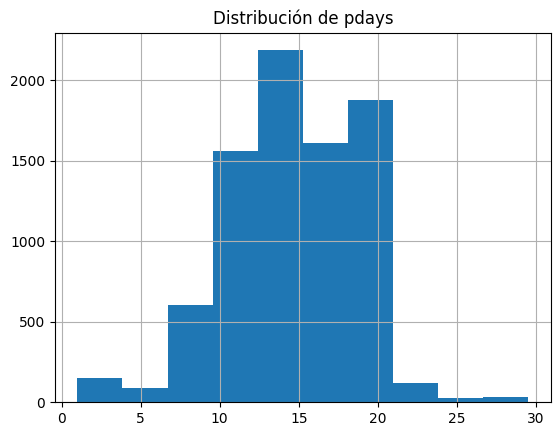

In [13]:
df.pdays = np.sqrt(df.pdays)
df.pdays.hist()
plt.title("Distribución de pdays")
plt.show()

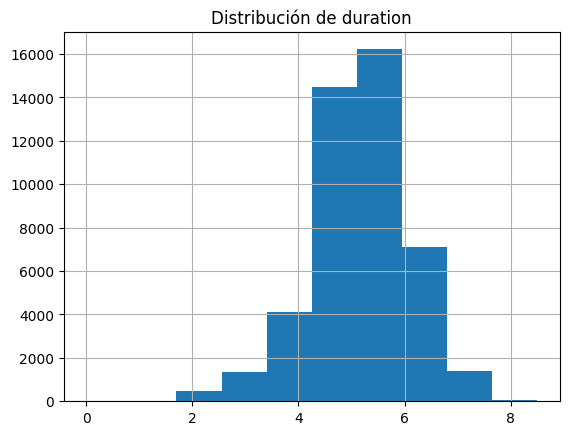

In [14]:
df.duration = np.log1p(df.duration)
df.duration.hist()
plt.title("Distribución de duration")
plt.show()

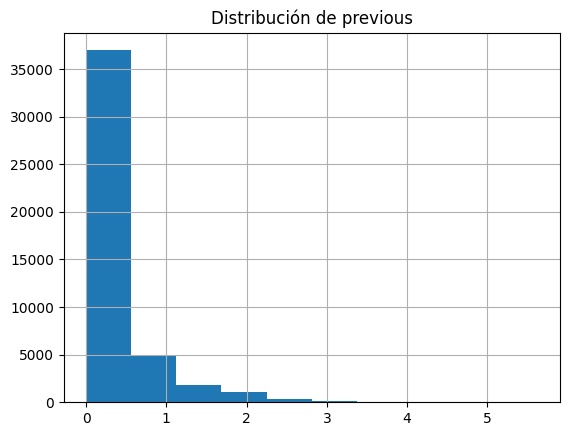

In [15]:
df.previous = np.log1p(df.previous)
df.previous.hist()
plt.title("Distribución de previous")
plt.show()

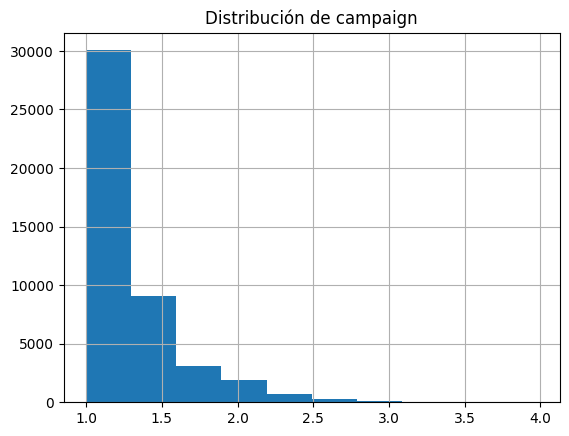

In [16]:
df.campaign = np.cbrt(df.campaign)
df.campaign.hist()
plt.title("Distribución de campaign")
plt.show()

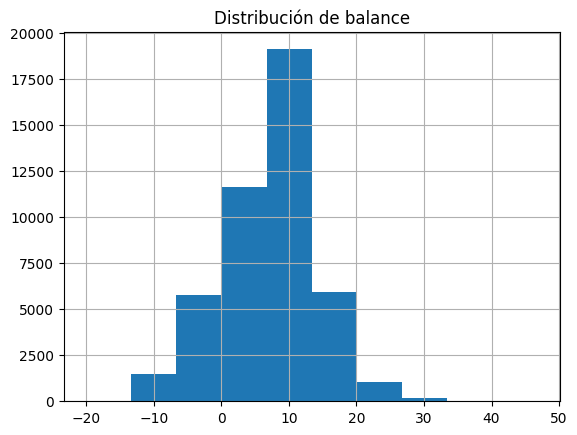

In [17]:
df.balance = np.cbrt(df.balance)
df.balance.hist()
plt.title("Distribución de balance")
plt.show()

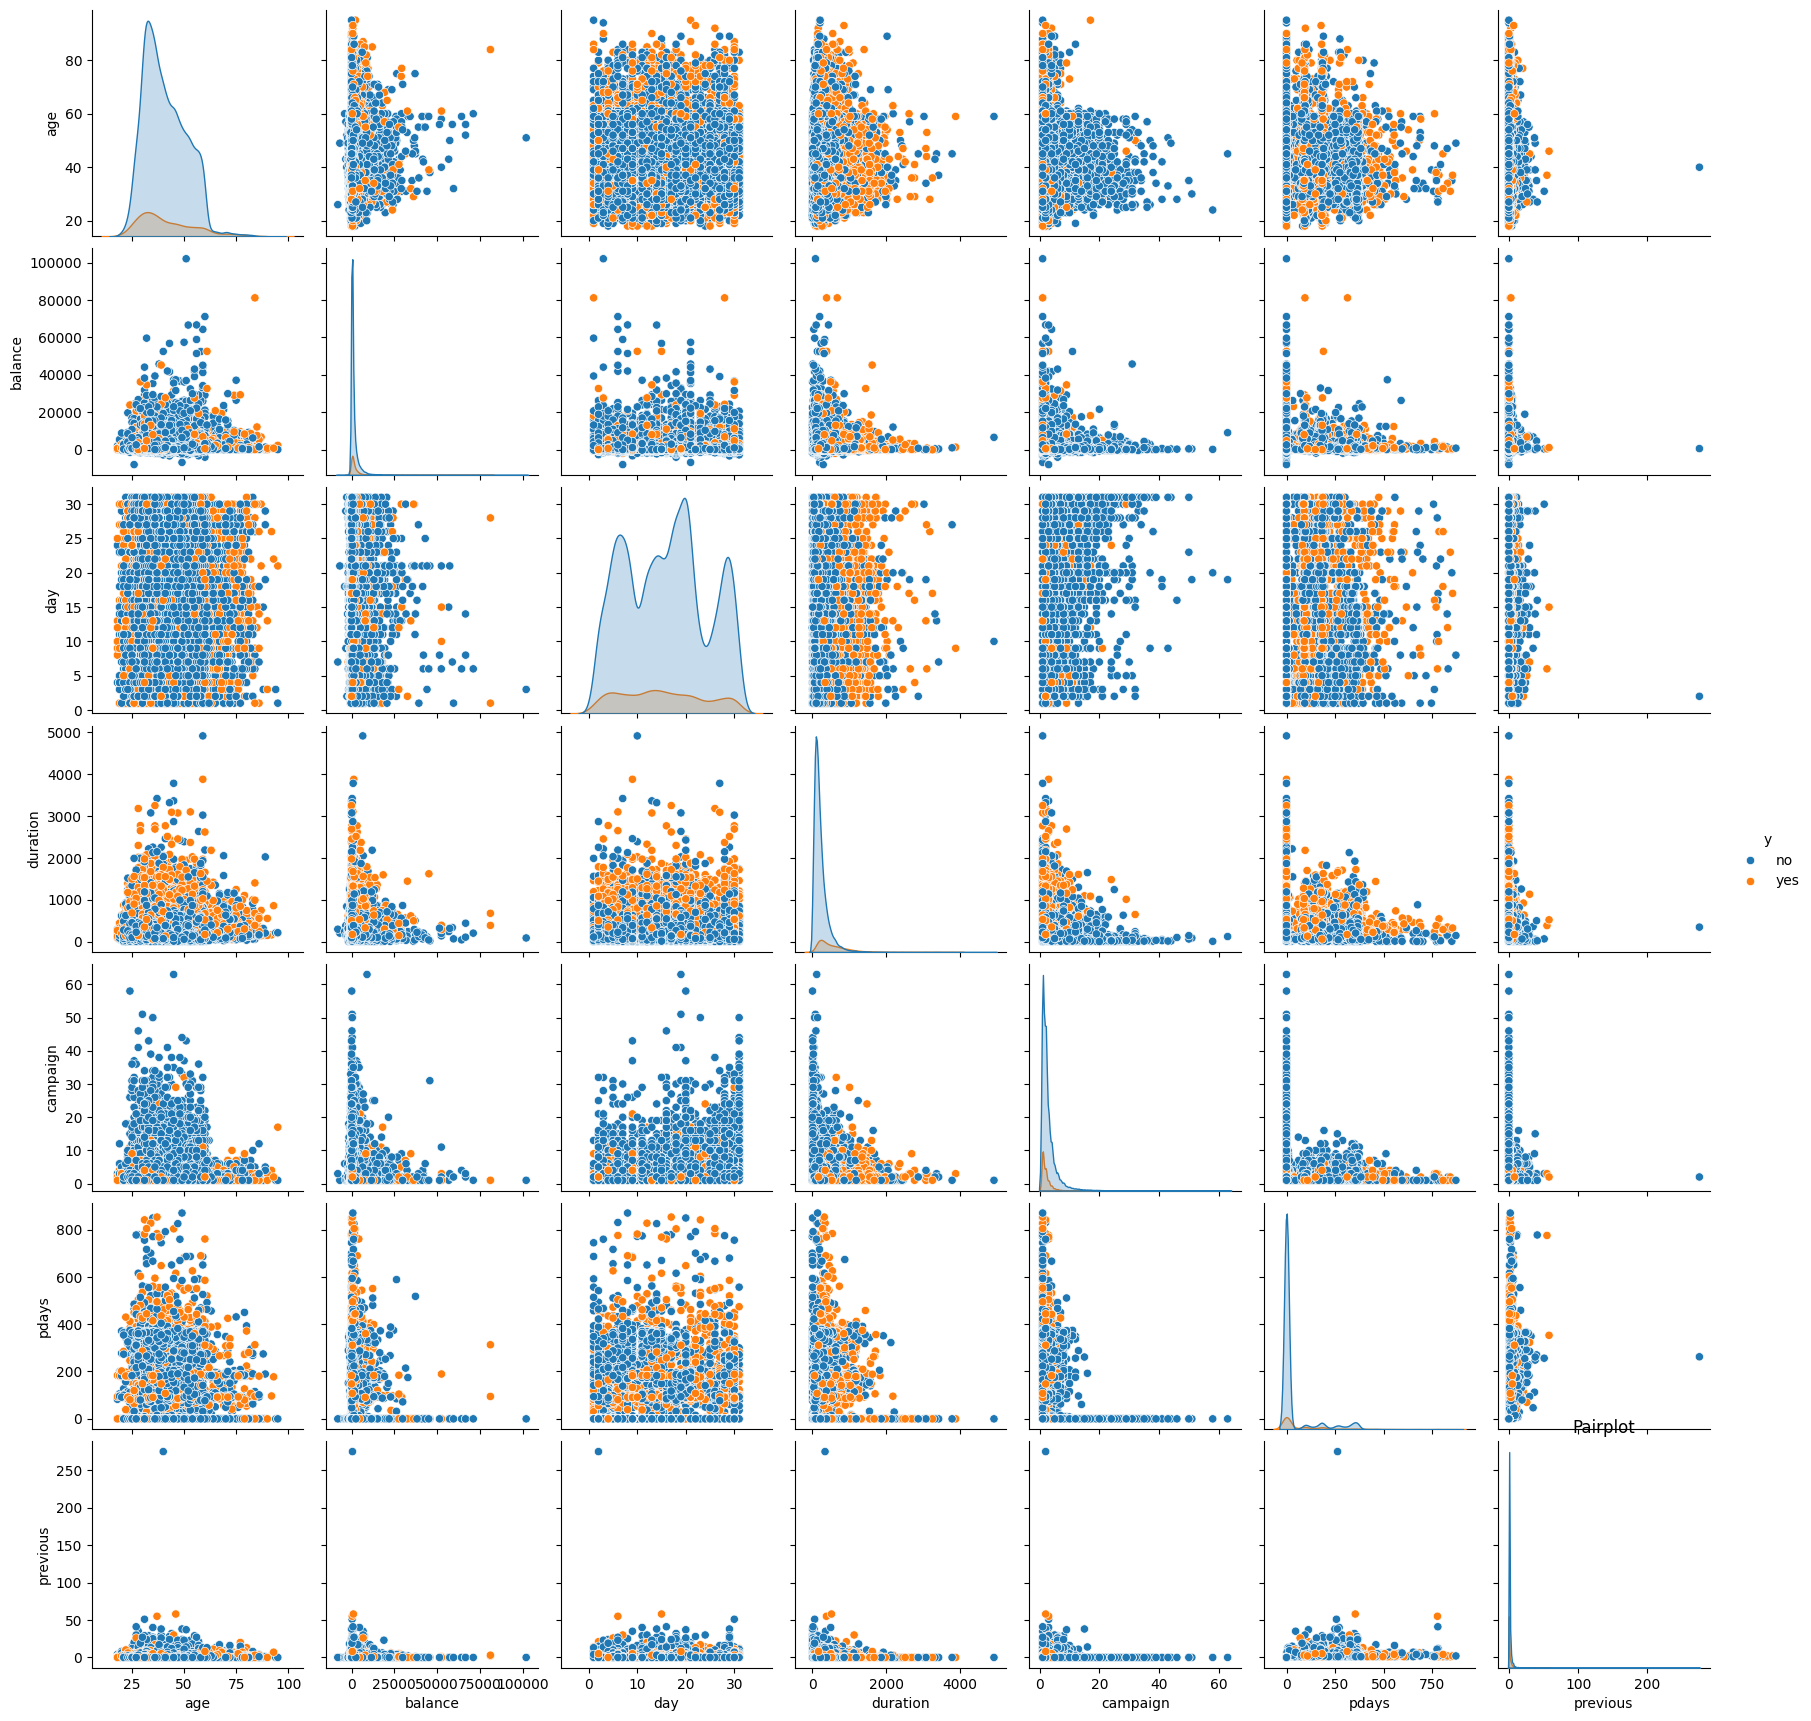

In [18]:
sns.pairplot(train_set[num_features + [target]], hue=target)
plt.title("Pairplot")
plt.show()

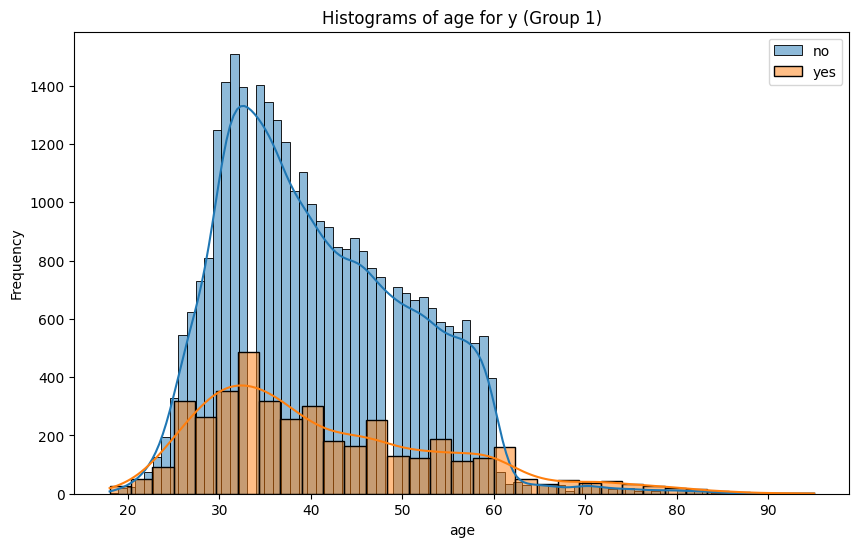

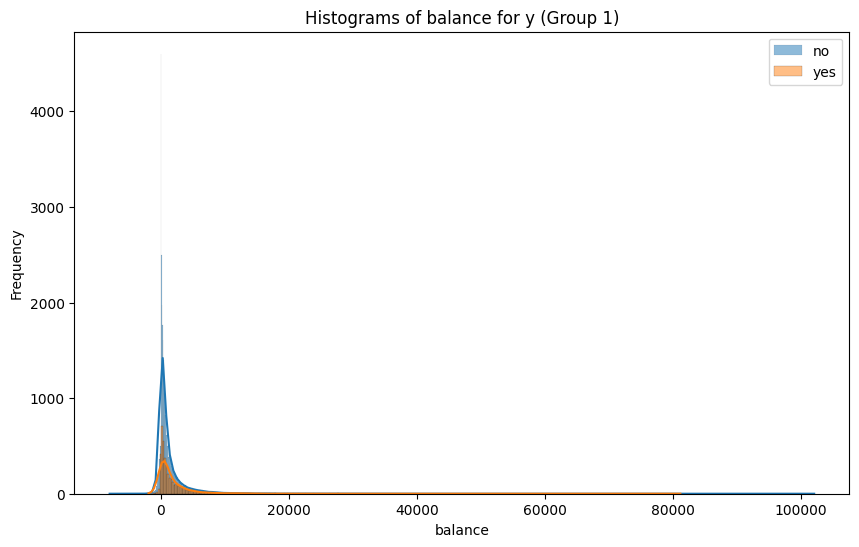

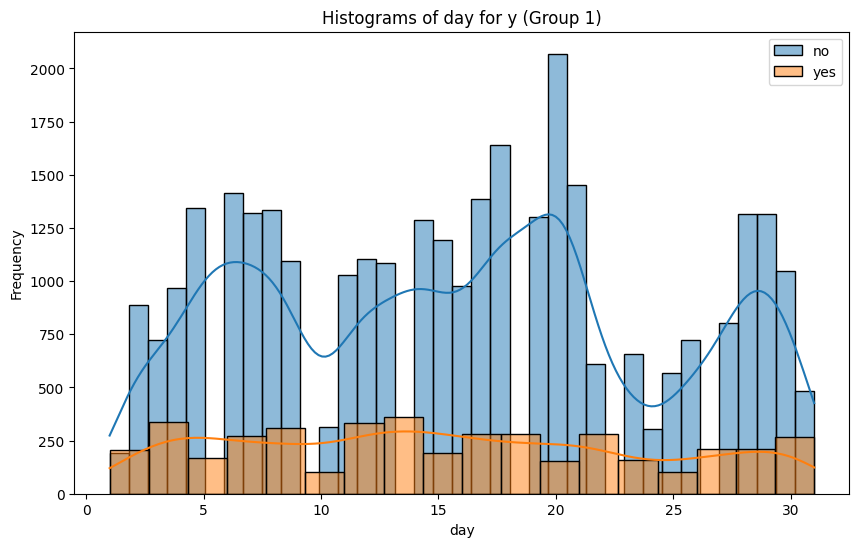

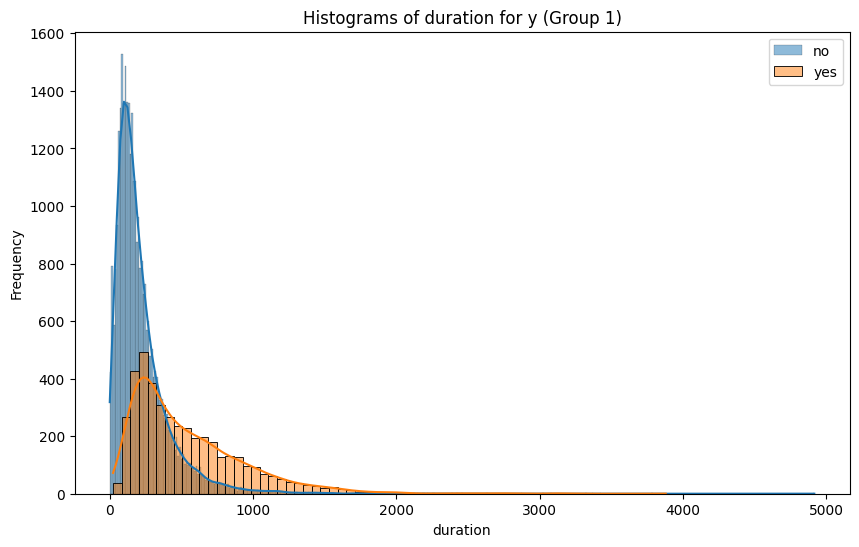

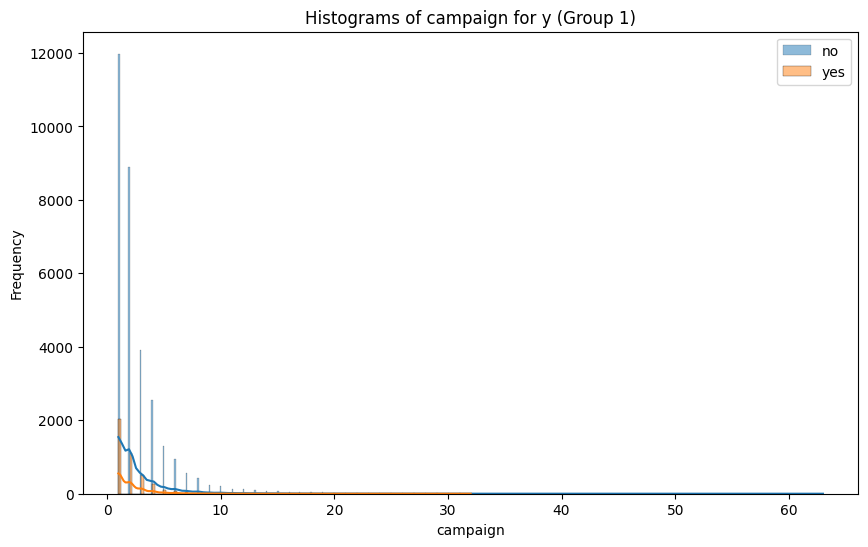

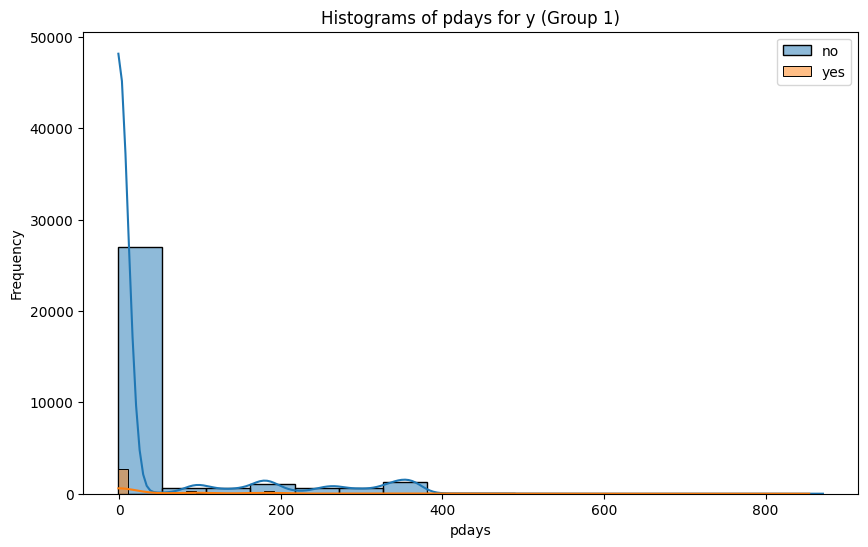

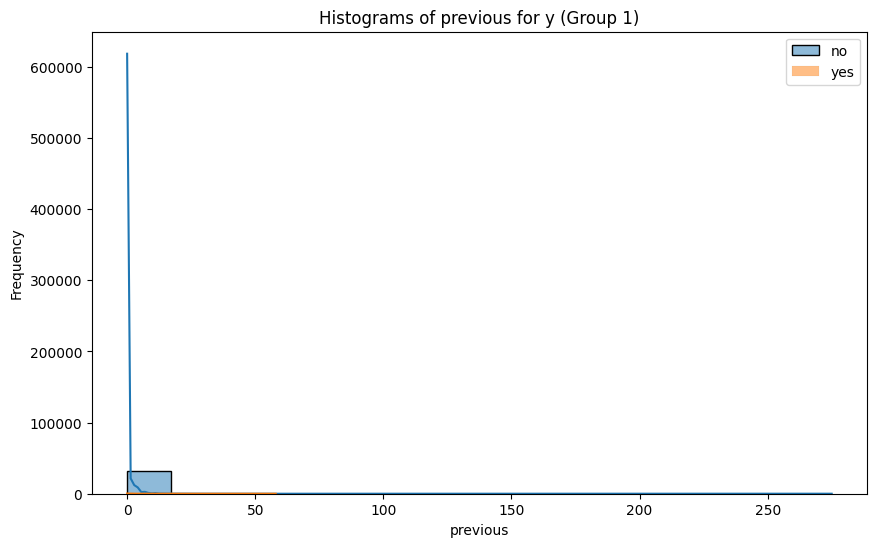

In [19]:
for col in num_features:
    bvt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size=2)

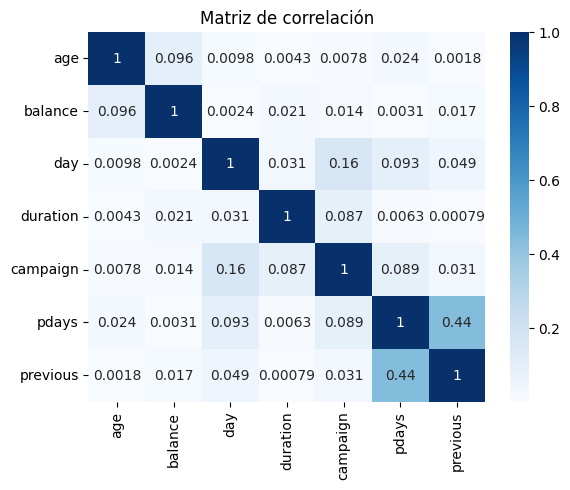

In [20]:
corr_mat = np.abs(train_set[num_features].corr())
sns.heatmap(corr_mat, annot=True, cmap='Blues')
plt.title("Matriz de correlación")
plt.show()

In [21]:
num_features_select = ["age","day","duration","pdays"]

#### Variables Categoricas

In [22]:
cat_features = [col for col in train_set if col not in num_features and col not in target]
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [23]:
# Convertir a numericas las variables binarias 'yes'/'no'
num_binaria = ['default','housing','loan']

# Para las variables categóricas con más de dos categorías, se utilizará OneHotEncoding ó OrdinalEncoding
encoding = ['job','marital','education','contact','month','poutcome']

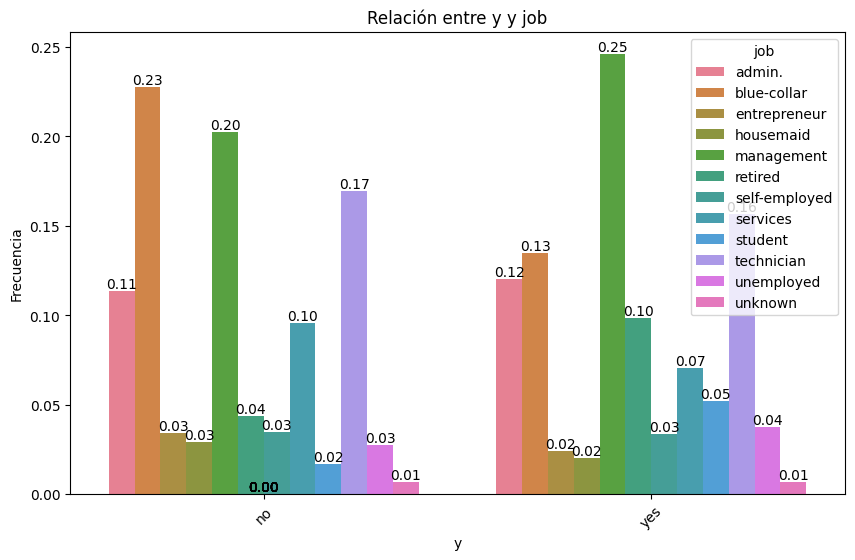

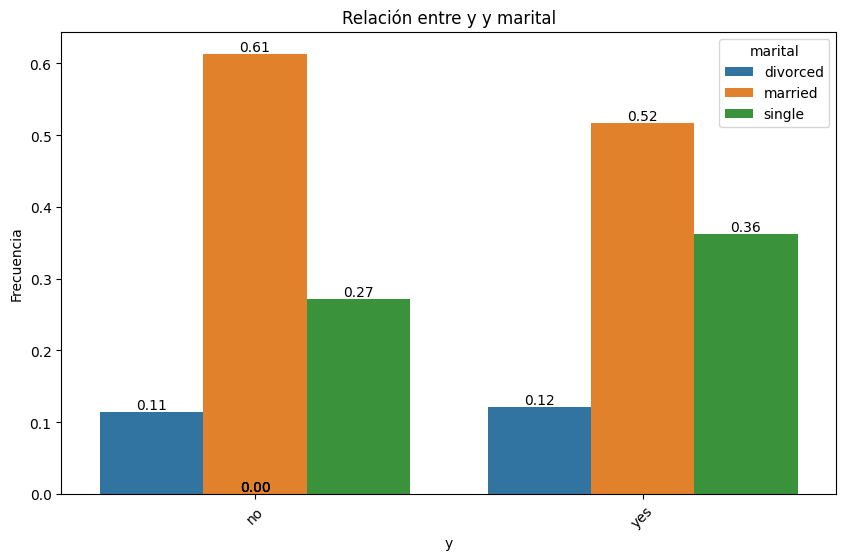

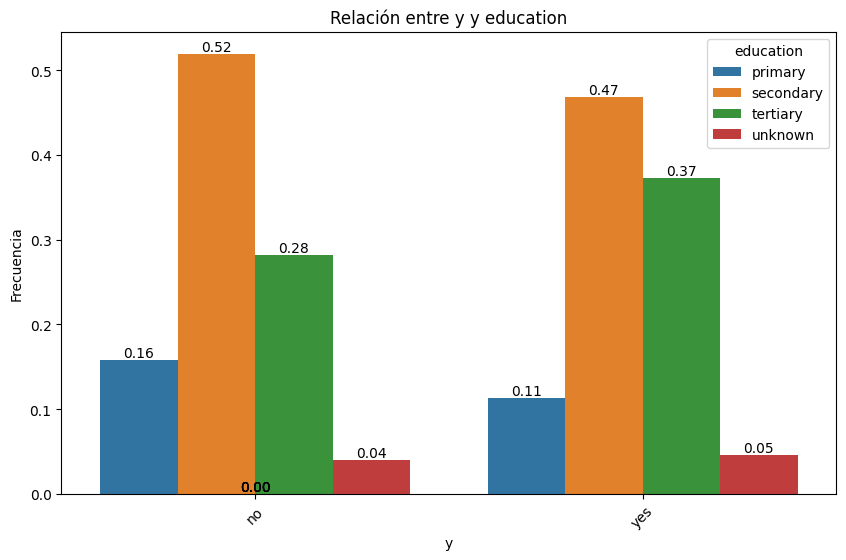

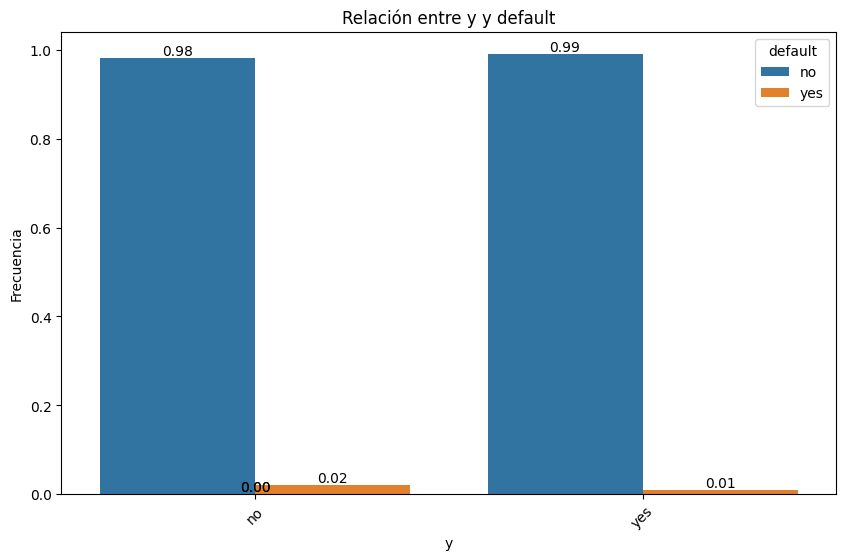

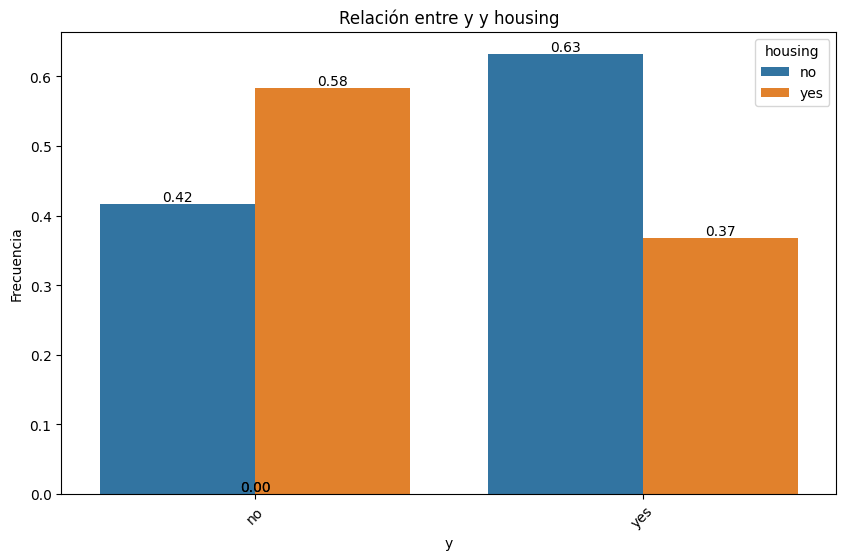

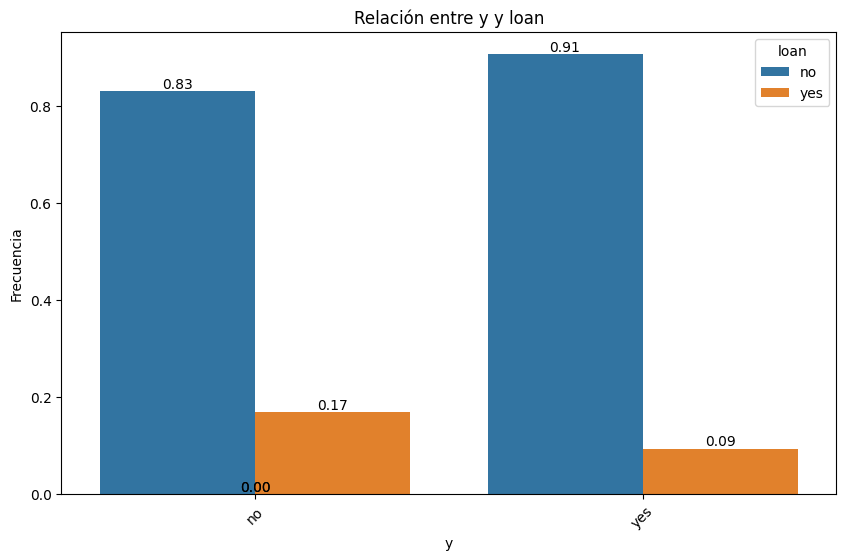

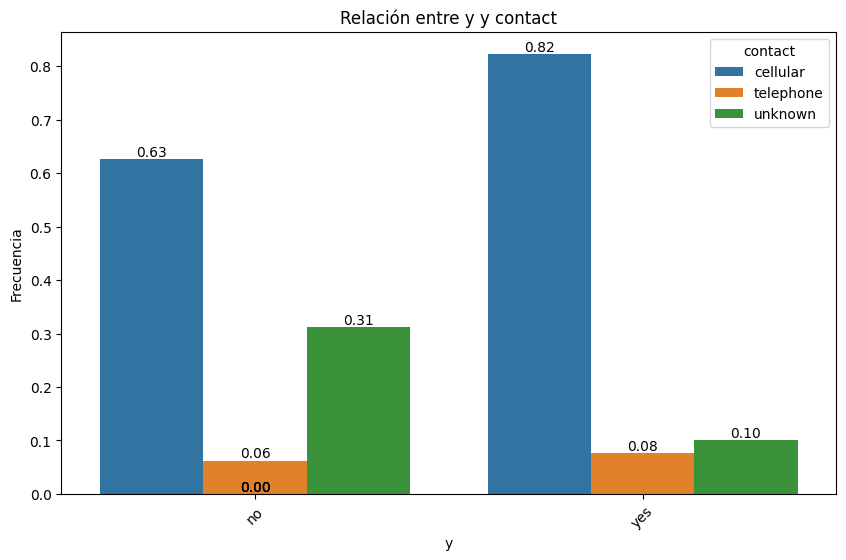

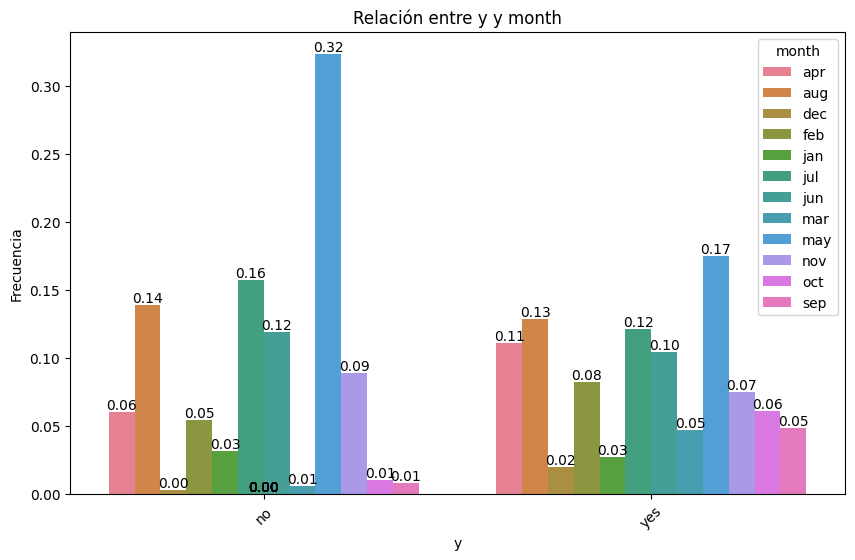

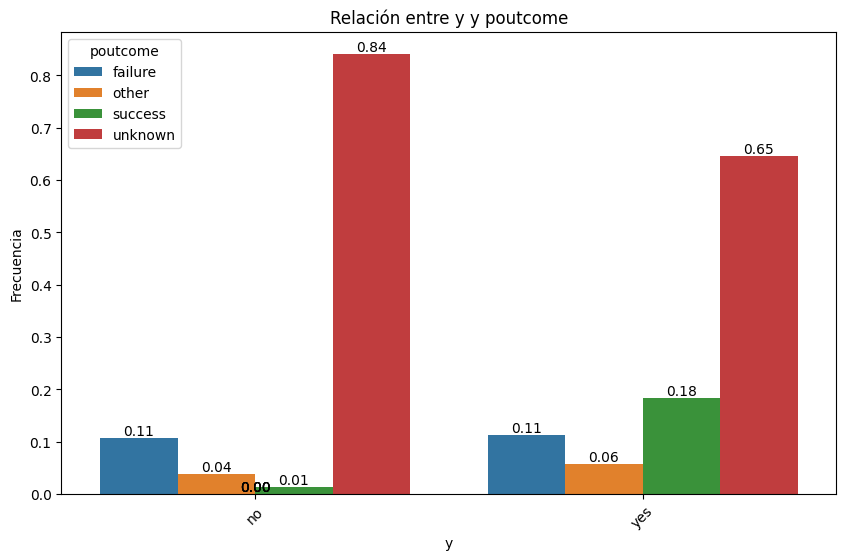

In [24]:
for feature in cat_features:
    bvt.plot_categorical_relationship_fin(train_set, target, feature, show_values=True, relative_freq=True)

In [25]:
cat_features_select = ['housing','poutcome']

In [26]:
num_features_select

['age', 'day', 'duration', 'pdays']

In [27]:
features = cat_features_select + num_features_select
features

['housing', 'poutcome', 'age', 'day', 'duration', 'pdays']

### Transformación de features

In [28]:
# Target a binario 1 = yes
train_set[target] = train_set[target].apply(lambda x: 1 if x=='yes' else 0).astype(int)
test_set[target] = test_set[target].apply(lambda x: 1 if x=='yes' else 0).astype(int)
train_set[target].value_counts()

y
0    31937
1     4231
Name: count, dtype: int64

In [29]:
bin_features_sel = [col for col in num_binaria if col in features]
bin_features_sel

['housing']

In [30]:
# num_binary ['housing'] a binaria, 1 = yes
for col in bin_features_sel:
    train_set[col] = train_set[col].apply(lambda x: 1 if x == 'yes' else 0).astype(int)
    test_set[col] = test_set[col].apply(lambda x: 1 if x == 'yes' else 0).astype(int)

In [31]:
# Separación de X y train/test
X_train = train_set[features].copy()
y_train = train_set[target].copy()

X_test = test_set[features].copy()
y_test = test_set[target].copy()

In [32]:
mejor_encoding = [col for col in encoding if col in features]
mejor_encoding

['poutcome']

In [33]:
# One hot encode fetures (Porque son pocas categorias: 4)
X_train = pd.get_dummies(X_train, columns = mejor_encoding)
X_test = pd.get_dummies(X_test, columns = mejor_encoding)

In [34]:
num_features_select = [col for col in num_features_select if col in features]
num_features_select

['age', 'day', 'duration', 'pdays']

In [35]:
# Estandarización para la regresión logistica
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[num_features_select] = scaler.fit_transform(X_train[num_features_select])

X_test_scaled = X_test.copy()
X_test_scaled[num_features_select] = scaler.transform(X_test[num_features_select])

### Selección y Entrenamiento del modelo

In [36]:
# Se instancia y se entrena el modelo de DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

# Se realizan las predicciones contra el test
y_pred_tree = tree_clf.predict(X_test)

# Evaluación con classification_report
report = classification_report(y_test, y_pred_tree)
print("Classification Report:\n\n", report)

Classification Report:

               precision    recall  f1-score   support

           0       0.92      0.92      0.92      7985
           1       0.38      0.39      0.38      1058

    accuracy                           0.85      9043
   macro avg       0.65      0.65      0.65      9043
weighted avg       0.86      0.85      0.85      9043



In [37]:
# Se instancia y se entrena el modelo de regresión logistica
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Se realizan las predicciones contra el test
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluación con classification_report
report = classification_report(y_test, y_pred_lr)
print("Classification Report:\n\n", report)

Classification Report:

               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.63      0.29      0.40      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.63      0.67      9043
weighted avg       0.88      0.90      0.88      9043



### Optimización

In [38]:
log_reg_grid = {'C': [0.01, 0.1, 1, 10],
             'solver': ['liblinear', 'lbfgs', 'newton-cg'],
             'max_iter': [100, 200, 300, 400, 500, 1000, 2000]
             }

tree_clf_grid = {'max_depth': [None,2,5,10,20,50],
                   'min_samples_split': [2,5,10,20],
                   'min_samples_leaf': [1,2,5,10]
                   }

In [39]:
# DecisionTreeClassifier RandomizedSearchCV

tree_clf_rndSearch = RandomizedSearchCV(tree_clf,
                                        tree_clf_grid, 
                                        n_iter=20, 
                                        cv=5, 
                                        scoring='accuracy',
                                        n_jobs=-1)

tree_clf_rndSearch.fit(X_train, y_train)

print("DecisionTreeClassifier RandomizedSearch Report:")
print(f"Best Params: {tree_clf_rndSearch.best_params_}")
print(f"Best Score: {tree_clf_rndSearch.best_score_}")

DecisionTreeClassifier RandomizedSearch Report:
Best Params: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5}
Best Score: 0.9017917601189002


In [40]:
# DecisionTreeClassifier GridSearchCV

tree_clf_GSearch = GridSearchCV(tree_clf, 
                                tree_clf_grid, 
                                cv=5, 
                                scoring='accuracy',
                                n_jobs=-1)

tree_clf_GSearch.fit(X_train, y_train)

print("DecisionTreeClassifier GridSearch Report:")
print(f"Best Params: {tree_clf_GSearch.best_params_}")
print(f"Best Score: {tree_clf_GSearch.best_score_}")

DecisionTreeClassifier GridSearch Report:
Best Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best Score: 0.9018747094280084


In [41]:
# LogisticRegression RandomizedSearchCV

log_reg_randSearch = RandomizedSearchCV(log_reg, 
                                   log_reg_grid, 
                                   n_iter=25, 
                                   cv=5, 
                                   scoring='accuracy', 
                                   n_jobs=-1)
log_reg_randSearch.fit(X_train, y_train)

print("DecisionTreeClassifier RandomizedSearch Report:")
print(f"Best Params: {log_reg_randSearch.best_params_}")
print(f"Best Score: {log_reg_randSearch.best_score_}")

DecisionTreeClassifier RandomizedSearch Report:
Best Params: {'solver': 'lbfgs', 'max_iter': 1000, 'C': 0.1}
Best Score: 0.8985014999563676


In [42]:
# LogisticRegressionGridSearchCV

log_reg_GSearch = GridSearchCV(log_reg, 
                          log_reg_grid, 
                          cv=5, 
                          scoring='accuracy',
                          n_jobs=-1)
log_reg_GSearch.fit(X_train, y_train)

print("LogisticRegression GridSearch Report:")
print(f"Best Params: {log_reg_GSearch.best_params_}")
print(f"Best Score: {log_reg_GSearch.best_score_}")

LogisticRegression GridSearch Report:
Best Params: {'C': 0.1, 'max_iter': 1000, 'solver': 'lbfgs'}
Best Score: 0.8985014999563676


### Comparación de modelos

In [43]:
# DecisionTreeClassifier
print("DecisionTreeClassifier RandomizedSearch Report:")
print(f"Best Params: {tree_clf_rndSearch.best_params_}")
print(f"Best Score: {tree_clf_rndSearch.best_score_}")
print(f"Best Estimator Score: {tree_clf_rndSearch.best_estimator_.score(X_test, y_test)}")
print()

# Logistic Regression
print("LogisticRegression RandomizedSearch Report:")
print(f"Best Params: {log_reg_randSearch.best_params_}")
print(f"Best Score: {log_reg_randSearch.best_score_}")
print(f"Best Estimator Score: {log_reg_randSearch.best_estimator_.score(X_test, y_test)}")

# DecisionTreeClassifier Tiene un ligero mejor rendimiento con RandomizedSearch que la regresión logistica

DecisionTreeClassifier RandomizedSearch Report:
Best Params: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5}
Best Score: 0.9017917601189002
Best Estimator Score: 0.8987061815769103

LogisticRegression RandomizedSearch Report:
Best Params: {'solver': 'lbfgs', 'max_iter': 1000, 'C': 0.1}
Best Score: 0.8985014999563676
Best Estimator Score: 0.8972686055512551


### Comparación contre el modelo Baseline

In [44]:
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [45]:
num_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [46]:
X_train_full = train_set[cat_features + num_features].copy()
y_train_full = train_set[target].copy()
X_test_full = test_set[cat_features + num_features].copy()
y_test_full = test_set[target].copy()

In [47]:
X_train_full = pd.get_dummies(X_train_full, columns=cat_features, dtype=int)
X_test_full = pd.get_dummies(X_test_full, columns=cat_features, dtype=int)

In [48]:
X_train_full[num_features] = scaler.fit_transform(X_train_full[num_features])
X_test_full[num_features] = scaler.transform(X_test_full[num_features])

In [57]:
# DecisionTreeClassifier RandomizedSearchCV

tree_clf_rndSearch_full = RandomizedSearchCV(tree_clf,
                                        tree_clf_grid, 
                                        n_iter=20, 
                                        cv=5, 
                                        scoring='accuracy',
                                        n_jobs=-1)

tree_clf_rndSearch_full.fit(X_train, y_train)

tree_clf_rndSearch_full.fit(X_train_full, y_train_full)
y_pred_tree_full = tree_clf_rndSearch_full.predict(X_test_full)

print(f"Classification Report: Test Data\nTodas las features\nFeatures Categoricas: One-Hot Encoded\nFeatures Numéricas: Escalado con Standard Scaler\n")
print(classification_report(y_test, y_pred_tree_full))

Classification Report: Test Data
Todas las features
Features Categoricas: One-Hot Encoded
Features Numéricas: Escalado con Standard Scaler

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7985
           1       0.65      0.31      0.42      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043

